# Study of the diversity of tools and annotations on the 'big' dataset 

In [1]:
import glob
import json
import re
from auxiliary_functions import *
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt 

In [2]:
sns.set(style = 'darkgrid', palette = 'Set2')
taille = (9, 5)

In [3]:
with open('../biocontainers.json', 'r') as f:
  biocontainers = json.load(f)

In [4]:
len(biocontainers)

890

In [5]:
tags = []
tags_lastword = []
for tool in biocontainers:
    tags+= biocontainers[tool]["tags"]
    for tag in biocontainers[tool]["tags"]:
        tags_lastword+=[tag.split(":")[-1]]


In [6]:
len(list(set(tags)))

240

In [7]:
len(list(set(tags_lastword)))

157

In [8]:
def get_tags(tools):
    tags = []
    for tool in tools:
        try:
            tags+= biocontainers[tool]["tags"]
        except:
            None
    return tags


def get_tags_lastword(tools):
    tags_lastword = []
    for tool in tools:
        try:
            for tag in biocontainers[tool]["tags"]:
                tags_lastword+=[tag.split(":")[-1]]
        except:
            None
    return tags_lastword


## Forming Data

In [9]:
#Function that 'finds' the end of the process, when we give the start position
#So it follows the pattern 'process name {....}'
def extract_curly(text, start):
    count_curly = 1
    end = start
    work= text
    while(count_curly != 0):
        if(work[end] == "{"):
            count_curly += 1
        elif(work[end] == "}"):
            count_curly -= 1
        end += 1
    return end

#Function that extract the processes for a given file 
def get_processes(file):
    #Read file
    code = ''
    with open(file, 'r') as f:
        code = f.read()
    processes = []
    #Find pattern
    for match in re.finditer(r'process\s+([^\s]+)\s*{', code):
        start = match.span(0)[0]
        end = extract_curly(code, match.span(0)[1])
        processes.append(code[start:end])
    return processes

In [10]:

workflows_dataset = []
for f in glob.glob(f'../../workflows_dataset/*', recursive=True):
    workflows_dataset.append(f.split("/")[-1])

In [11]:
dico = {}

for wf in workflows_dataset:
    dico[wf] = []
    for f in glob.glob(f'../../workflows_dataset/{wf}/**/*.nf', recursive=True):
    #for f in glob.glob(f'./{wf}/**/*.nf', recursive=True):
        dico[wf]+= get_processes(f)

In [12]:
workflows = {}
for wf in dico:
    workflows[wf]={}
    for p in dico[wf]:
        workflows[wf][get_name_process(p)] = get_tools(get_script(p), code="clemence")

## Study

> Need to keep in mind, that the extraction of the tools isn't a 100% perfect -> the tools which we extract are candiate tools

## Diversity annotations per workflow

In [13]:
#Collecting all the topics and occurences
count_occurences = {}
count_occurences['tags'] = {}
count_occurences['tags_lastword'] = {}
for wf in workflows:
    count_occurences['tags'][wf] = []
    count_occurences['tags_lastword'][wf] = []
    for p in workflows[wf]:
        count_occurences['tags'][wf] += get_tags(workflows[wf][p])
        count_occurences['tags_lastword'][wf] += get_tags_lastword(workflows[wf][p])
    

In [14]:
for wf in workflows:
    labels = list(set(count_occurences['tags'][wf]))
    print(f"{(len(labels)/240 *100):.2f}% of biocontainers tags are used by {wf}")
    #print(pd.Series(count_occurences['operations'][wf]).value_counts())
    #print("\n------------")
    

#http://edamontology.org/operation_0565

7.92% of biocontainers tags are used by CalliNGS-NF
0.83% of biocontainers tags are used by RNAseqPipe
14.17% of biocontainers tags are used by circrna
0.00% of biocontainers tags are used by grape-nf
6.67% of biocontainers tags are used by rnaSeq_byBABS
7.50% of biocontainers tags are used by isoseq
10.83% of biocontainers tags are used by smRNAseq
8.75% of biocontainers tags are used by rna_seq_kallisto1
10.00% of biocontainers tags are used by modulome-workflow
2.92% of biocontainers tags are used by LncPipe
1.67% of biocontainers tags are used by spatialtranscriptomics
8.75% of biocontainers tags are used by rnaflow
0.00% of biocontainers tags are used by Long-Read-Proteogenomics
7.92% of biocontainers tags are used by tsRNAsearch
6.25% of biocontainers tags are used by rna-pipeline
0.00% of biocontainers tags are used by differentialabundance
7.92% of biocontainers tags are used by tsrna-de
0.00% of biocontainers tags are used by CrossSpeciesIntegration
2.08% of biocontainers tags

In [15]:
for wf in workflows:
    labels = list(set(count_occurences['tags_lastword'][wf]))
    print(f"{(len(labels)/240 *100):.2f}% of biocontainers tags_lastword are used by {wf}")
    #print(pd.Series(count_occurences['operations'][wf]).value_counts())
    #print("\n------------")

7.50% of biocontainers tags_lastword are used by CalliNGS-NF
0.83% of biocontainers tags_lastword are used by RNAseqPipe
11.25% of biocontainers tags_lastword are used by circrna
0.00% of biocontainers tags_lastword are used by grape-nf
6.67% of biocontainers tags_lastword are used by rnaSeq_byBABS
7.08% of biocontainers tags_lastword are used by isoseq
9.17% of biocontainers tags_lastword are used by smRNAseq
7.92% of biocontainers tags_lastword are used by rna_seq_kallisto1
8.75% of biocontainers tags_lastword are used by modulome-workflow
2.92% of biocontainers tags_lastword are used by LncPipe
1.67% of biocontainers tags_lastword are used by spatialtranscriptomics
8.33% of biocontainers tags_lastword are used by rnaflow
0.00% of biocontainers tags_lastword are used by Long-Read-Proteogenomics
7.50% of biocontainers tags_lastword are used by tsRNAsearch
6.25% of biocontainers tags_lastword are used by rna-pipeline
0.00% of biocontainers tags_lastword are used by differentialabundanc

## Diversity annotations 

> As a reminder, there are **243** tags used in bioweb and **157** tags_lastword

In [16]:
count_occurences = {}
count_occurences['tags'] = []
count_occurences['tags_lastword'] = []
for wf in workflows:
    for p in workflows[wf]:
        count_occurences['tags'] += get_tags(workflows[wf][p])
        count_occurences['tags_lastword'] += get_tags_lastword(workflows[wf][p])
    

### Tags occurences

In [17]:
print(pd.Series(count_occurences['tags']).value_counts())

Genomics                           82
field::biology:bioinformatics      61
field::biology                     61
use::analysing                     59
:commandline                       58
:filtering                         55
:calculating                       52
implemented-in::c                  52
works-with::biological-sequence    52
:program                           51
protocol::ftp                      50
scope::utility                     50
uitoolkit::ncurses                 50
protocol::http                     50
network::client                    50
role::program                      35
                                   29
General                            19
interface::x11                     19
interface::graphical               19
implemented-in::c++                 9
:biological-sequence                8
:comparing                          7
:converting                         5
scope::suite                        5
science::calculation                5
use::compari

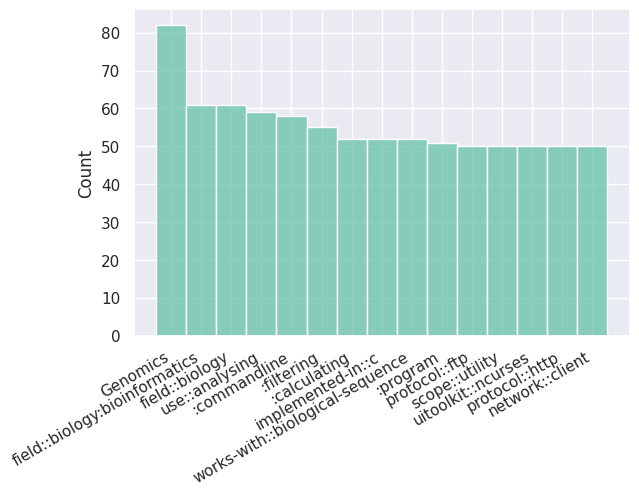

In [18]:
tab_occurences = pd.Series(count_occurences['tags']).value_counts()[:15]
index= list(tab_occurences.index)

temp = []
for i in range(len(tab_occurences)):
    for t in range(tab_occurences[i]):
        temp +=  [index[i]]

sns.histplot(pd.Series(temp))
fig = plt.gcf()
fig.autofmt_xdate()

In [19]:
labels = list(set(count_occurences['tags']))
print(f"{(len(labels)/243 *100):.2f}% of biocontainers tags are used by all the corpus (30 workflows)")

15.64% of biocontainers tags are used by all the corpus (30 workflows)


### tags_lastword occurences

In [20]:
print(pd.Series(count_occurences['tags_lastword']).value_counts())

program                86
Genomics               82
commandline            61
bioinformatics         61
biology                61
biological-sequence    60
analysing              59
filtering              55
utility                53
c                      53
calculating            52
client                 50
http                   50
ncurses                50
ftp                    50
                       29
graphical              19
General                19
x11                    19
c++                    11
comparing              11
calculation             5
converting              5
suite                   5
python                  2
text                    2
nucleic-acids           2
html                    2
text-mode               1
peptidic                1
Transcriptomics         1
dtype: int64


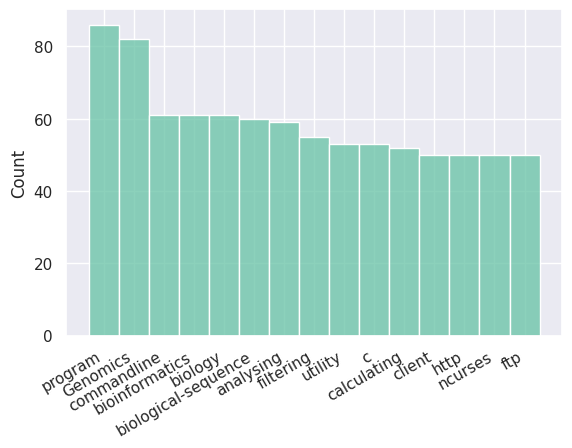

In [21]:
tab_occurences = pd.Series(count_occurences['tags_lastword']).value_counts()[:15]
index= list(tab_occurences.index)

temp = []
for i in range(len(tab_occurences)):
    for t in range(tab_occurences[i]):
        temp +=  [index[i]]

sns.histplot(pd.Series(temp))
fig = plt.gcf()
fig.autofmt_xdate()

In [22]:
labels = list(set(count_occurences['tags_lastword']))
print(f"{(len(labels)/157 *100):.2f}% of biocontainers tags_lastword are used by all the corpus (30 workflows)")

19.75% of biocontainers tags_lastword are used by all the corpus (30 workflows)
